# Problem Statement

    Your client is an Insurance company and they need your help in building a model to predict whether the policyholder (customer) will pay next premium on time or not.


# Variable	Definition

1.  **id** : Unique ID of the policy

1.  **perc_premium_paid_by_cash_credit** : Percentage of premium amount paid by cash or credit card

1.  **age_in_days** : Age in days of policy holder

1.  **Income** : Monthly Income of policy holder

1.  **Count_3-6_months_late** : No of premiums late by 3 to 6 months

1.  **Count_6-12_months_late** : No  of premiums late by 6 to 12 months

1.  **Count_more_than_12_months_late** : No of premiums late by more than 12 months

1.  **application_underwriting_score** : Underwriting Score of the applicant at the time of application (No applications under the score of 90 are insured)

1.  **no_of_premiums_paid** : Total premiums paid on time till now

1.  **sourcing_channel** : Sourcing channel for application

1.  **residence_area_type** : Area type of Residence (Urban/Rural)

1.  **target** : 1 - premium paid on time, 0 - otherwise


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train_qnU1GcL.csv')
df = df_train.copy()
df_test = pd.read_csv('test_LxCaReE_DvdCKVT_v2s0Z4r.csv')
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,110936,41492,31300,19415,99379,59951,54031,94290,93730,84844,87400,51808,104167,52420,42421
perc_premium_paid_by_cash_credit,0.429,0.01,0.917,0.049,0.052,0.54,1,1,0.621,0.908,0.051,0.033,1,0.111,0.027
age_in_days,12058,21546,17531,15341,31400,17527,24829,21911,9868,23008,17529,16075,16436,19723,16430
Income,355060,315150,84140,250510,198680,282080,118400,180240,92520,107180,200100,122060,27290,136000,114110
Count_3-6_months_late,0,0,2,0,0,2,0,1,0,2,1,0,1,0,0
Count_6-12_months_late,0,0,3,0,0,0,0,6,0,0,0,0,0,0,0
Count_more_than_12_months_late,0,0,1,0,0,0,0,4,0,0,0,0,1,0,1
application_underwriting_score,99.02,99.89,98.69,99.57,99.87,99.18,99.05,99.33,99.58,98.91,98.66,97.03,98.32,99.59,98.7
no_of_premiums_paid,13,21,7,9,12,9,11,3,4,11,22,7,4,9,13
sourcing_channel,C,A,C,A,B,B,B,A,A,A,C,B,A,A,D


In [3]:
df.shape

(79853, 12)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,79853.0,57167.166368,32928.970160,2.0,28640.000,57262.000,85632.000,114076.00
perc_premium_paid_by_cash_credit,79853.0,0.314288,0.334915,0.0,0.034,0.167,0.538,1.00
age_in_days,79853.0,18846.696906,5208.719136,7670.0,14974.000,18625.000,22636.000,37602.00
Income,79853.0,208847.171177,496582.597257,24030.0,108010.000,166560.000,252090.000,90262600.00
Count_3-6_months_late,79756.0,0.248671,0.691468,0.0,0.000,0.000,0.000,13.00
Count_6-12_months_late,79756.0,0.078188,0.436507,0.0,0.000,0.000,0.000,17.00
Count_more_than_12_months_late,79756.0,0.060008,0.312023,0.0,0.000,0.000,0.000,11.00
application_underwriting_score,76879.0,99.067291,0.739799,91.9,98.810,99.210,99.540,99.89
no_of_premiums_paid,79853.0,10.863887,5.170687,2.0,7.000,10.000,14.000,60.00
target,79853.0,0.937410,0.242226,0.0,1.000,1.000,1.000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
id                                  79853 non-null int64
perc_premium_paid_by_cash_credit    79853 non-null float64
age_in_days                         79853 non-null int64
Income                              79853 non-null int64
Count_3-6_months_late               79756 non-null float64
Count_6-12_months_late              79756 non-null float64
Count_more_than_12_months_late      79756 non-null float64
application_underwriting_score      76879 non-null float64
no_of_premiums_paid                 79853 non-null int64
sourcing_channel                    79853 non-null object
residence_area_type                 79853 non-null object
target                              79853 non-null int64
dtypes: float64(5), int64(5), object(2)
memory usage: 7.3+ MB


In [6]:
df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

# Univariate analysis

## id

In [7]:
df.id.describe()

count     79853.000000
mean      57167.166368
std       32928.970160
min           2.000000
25%       28640.000000
50%       57262.000000
75%       85632.000000
max      114076.000000
Name: id, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


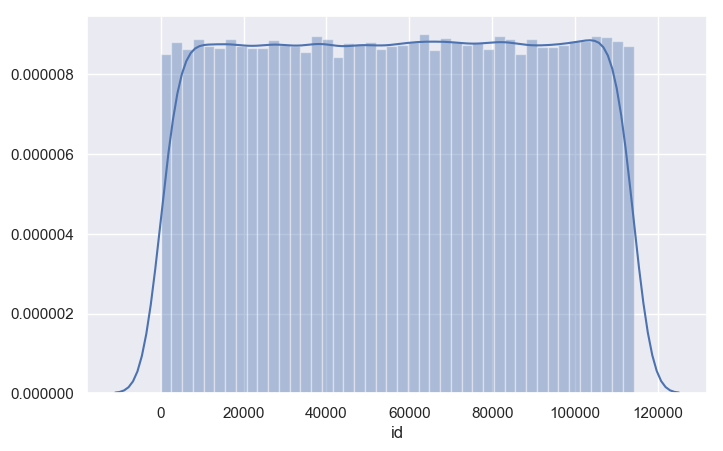

In [8]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.distplot(df.id)

## perc_premium_paid_by_cash_credit

In [9]:
pd.options.display.float_format = '{:.4f}'.format
df.perc_premium_paid_by_cash_credit.describe(percentiles=[0,.25,.5,.75,.9,.99,1])

count   79853.0000
mean        0.3143
std         0.3349
min         0.0000
0%          0.0000
25%         0.0340
50%         0.1670
75%         0.5380
90%         0.9250
99%         1.0000
100%        1.0000
max         1.0000
Name: perc_premium_paid_by_cash_credit, dtype: float64

In [10]:
df.query('perc_premium_paid_by_cash_credit==1')['target'].value_counts()

1    4025
0     979
Name: target, dtype: int64

In [11]:
df.perc_premium_paid_by_cash_credit.value_counts().head()

0.0000    5723
1.0000    5004
0.0010     698
0.0020     612
0.0030     551
Name: perc_premium_paid_by_cash_credit, dtype: int64

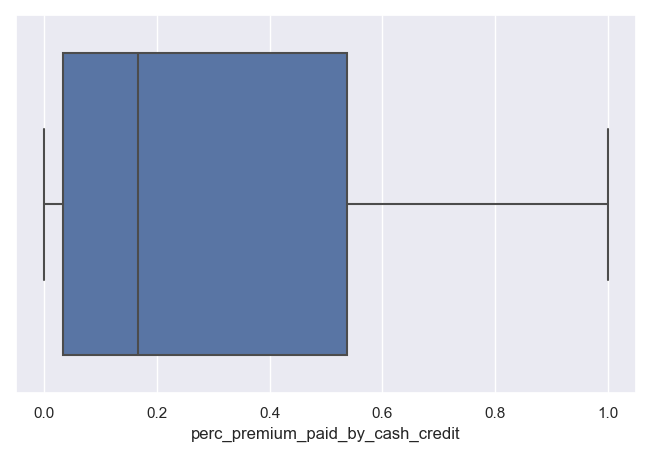

In [12]:
sns.boxplot(df.perc_premium_paid_by_cash_credit);

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


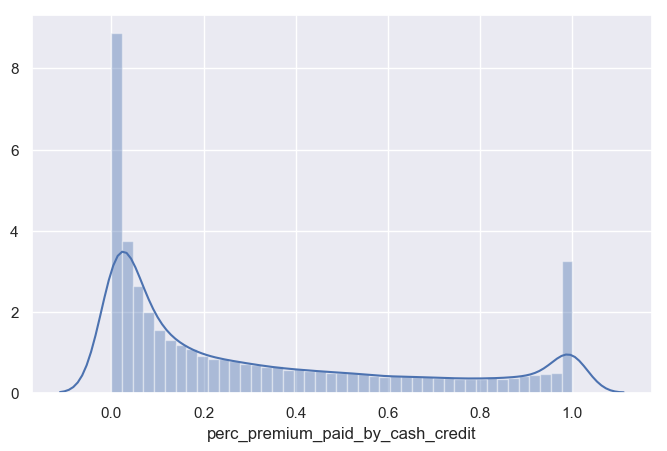

In [13]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.distplot(df.perc_premium_paid_by_cash_credit);

-  Values are decreasing between 0 and 1, there is a sudden spike at 0 and 1.

## age_in_days

In [14]:
df.age_in_days.describe()

count   79853.0000
mean    18846.6969
std      5208.7191
min      7670.0000
25%     14974.0000
50%     18625.0000
75%     22636.0000
max     37602.0000
Name: age_in_days, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


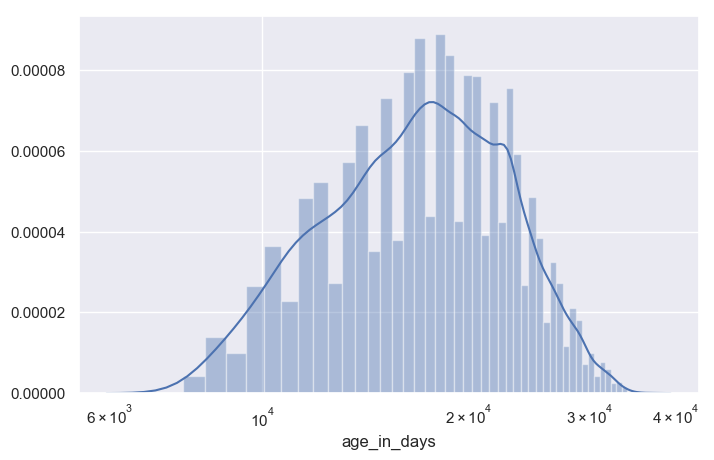

In [15]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.distplot(df.age_in_days);
plt.xscale('log')

-  Ages are normally distributed.

## Income

In [16]:
pd.options.display.float_format = '{:.4f}'.format
df.Income.describe(percentiles=[0,0.25,0.5,0.75,0.9,0.99,.999,1])

count      79853.0000
mean      208847.1712
std       496582.5973
min        24030.0000
0%         24030.0000
25%       108010.0000
50%       166560.0000
75%       252090.0000
90%       357414.0000
99%       771078.0000
99.9%    2413366.9600
100%    90262600.0000
max     90262600.0000
Name: Income, dtype: float64

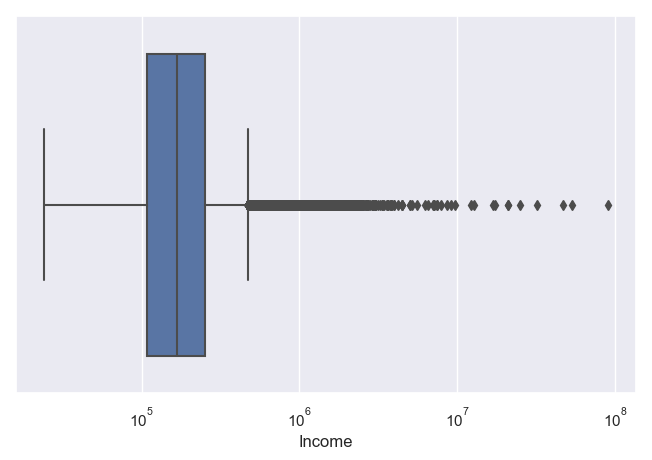

In [17]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(df.Income);
plt.xscale('log')

- Many outliers on the right of the 75th quantile.

## Count_3-6_months_late

In [18]:
df['Count_3-6_months_late'].describe()

count   79756.0000
mean        0.2487
std         0.6915
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max        13.0000
Name: Count_3-6_months_late, dtype: float64

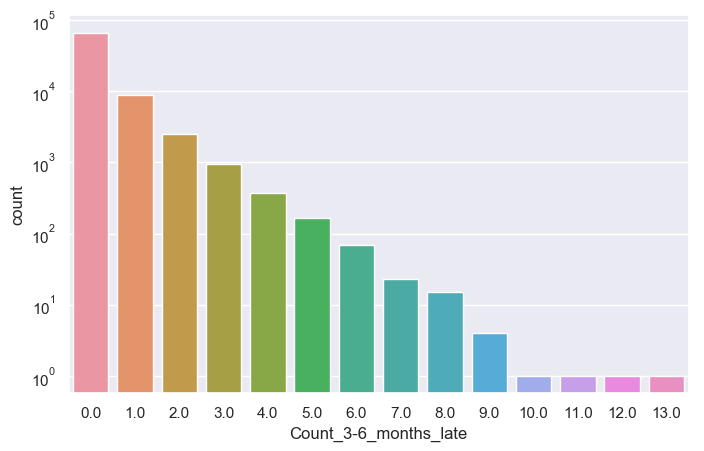

In [19]:
sns.countplot(df['Count_3-6_months_late']);
plt.yscale('log')

- Decreasing 

## Count_6-12_months_late

In [20]:
df['Count_6-12_months_late'].describe()

count   79756.0000
mean        0.0782
std         0.4365
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max        17.0000
Name: Count_6-12_months_late, dtype: float64

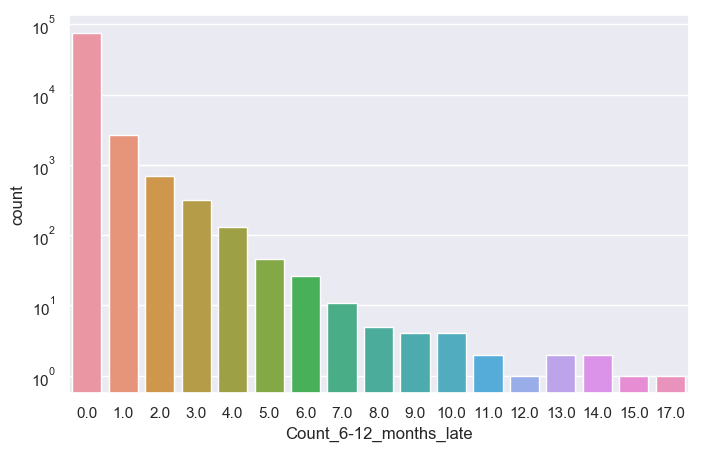

In [21]:
sns.countplot(df['Count_6-12_months_late']);
plt.yscale('log')

- Decreasing number of late payee

## Count_more_than_12_months_late

In [22]:
df['Count_more_than_12_months_late'].describe()

count   79756.0000
mean        0.0600
std         0.3120
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max        11.0000
Name: Count_more_than_12_months_late, dtype: float64

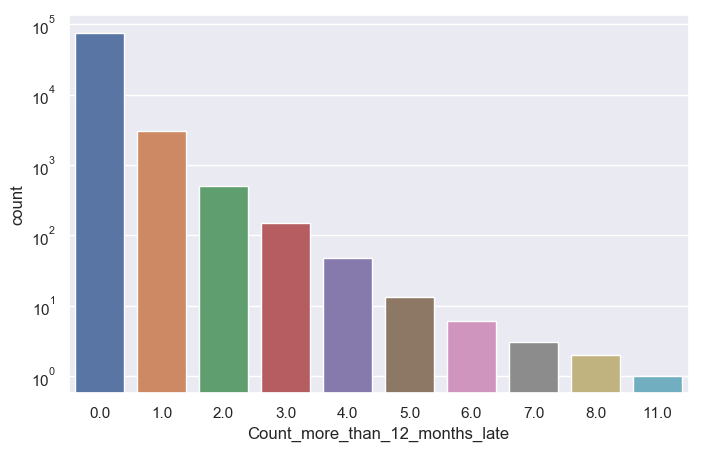

In [23]:
sns.countplot(df['Count_more_than_12_months_late']);
plt.yscale('log')

- Decreasing number of late payee

## application_underwriting_score

In [24]:
df['application_underwriting_score'].describe()

count   76879.0000
mean       99.0673
std         0.7398
min        91.9000
25%        98.8100
50%        99.2100
75%        99.5400
max        99.8900
Name: application_underwriting_score, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


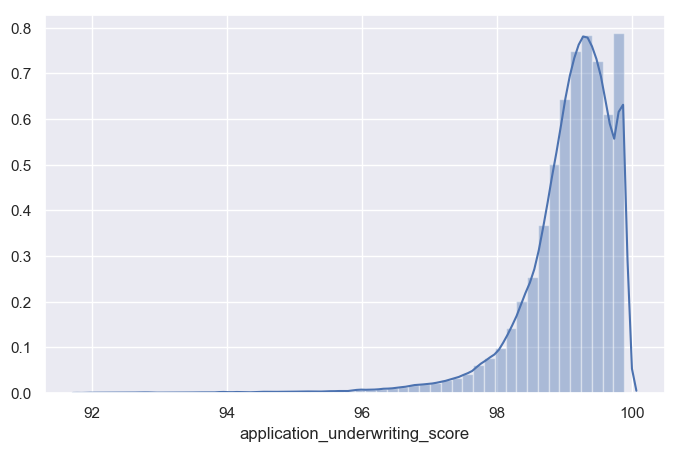

In [25]:
sns.distplot(df.loc[df['application_underwriting_score'].notnull(),'application_underwriting_score']);

## no_of_premiums_paid

In [26]:
df['no_of_premiums_paid'].describe()

count   79853.0000
mean       10.8639
std         5.1707
min         2.0000
25%         7.0000
50%        10.0000
75%        14.0000
max        60.0000
Name: no_of_premiums_paid, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


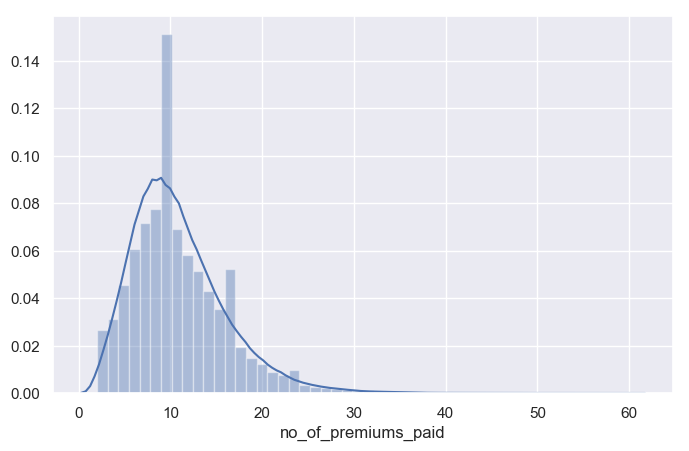

In [27]:
sns.distplot(df.loc[df['no_of_premiums_paid'].notnull(),'no_of_premiums_paid']);

## Count_premium_paid (derived)

In [28]:
df['Count_premium_paid'] = df['no_of_premiums_paid'] + (df['Count_more_than_12_months_late'] + df['Count_6-12_months_late'] + df['Count_3-6_months_late']) 


In [29]:
df['Count_premium_paid'].describe()

count   79756.0000
mean       11.2615
std         5.2739
min         2.0000
25%         8.0000
50%        10.0000
75%        14.0000
max        60.0000
Name: Count_premium_paid, dtype: float64

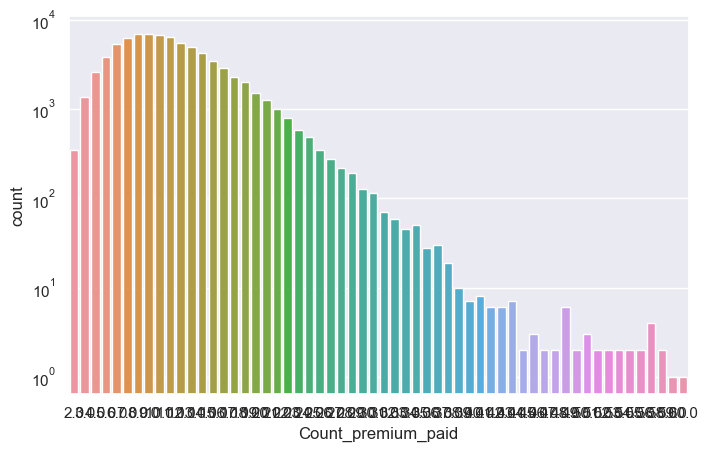

In [30]:
sns.countplot(df['Count_premium_paid']);
plt.yscale('log')

- Decreasing number of late payee

## sourcing_channel

In [31]:
df['sourcing_channel'].describe()

count     79853
unique        5
top           A
freq      43134
Name: sourcing_channel, dtype: object

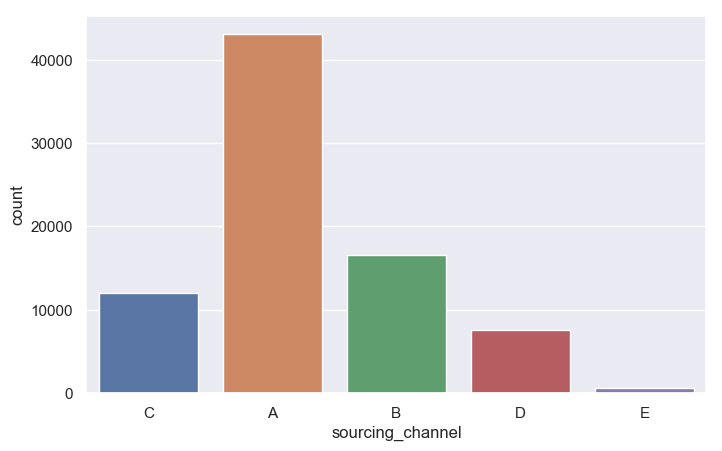

In [32]:
sns.countplot(df['sourcing_channel']);


## residence_area_type

In [33]:
df['residence_area_type'].describe()

count     79853
unique        2
top       Urban
freq      48183
Name: residence_area_type, dtype: object

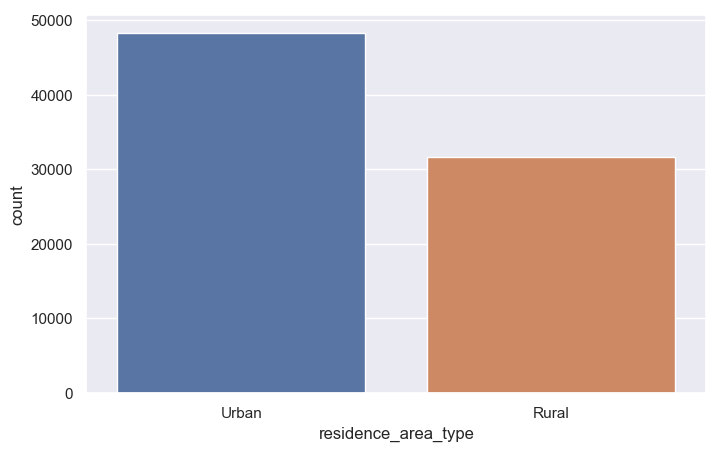

In [34]:
sns.countplot(df['residence_area_type']);


## age_in_years (derived)

In [35]:
df['age_in_years'] = df['age_in_days'].apply(lambda x: x//365)

In [36]:
df.age_in_years.describe(percentiles=[0,.25,.5,.75,.9,.99,.999,1])

count   79853.0000
mean       51.6074
std        14.2705
min        21.0000
0%         21.0000
25%        41.0000
50%        51.0000
75%        62.0000
90%        71.0000
99%        86.0000
99.9%      92.0000
100%      103.0000
max       103.0000
Name: age_in_years, dtype: float64

- max age is 103.

In [37]:
df.query('age_in_years > 99')

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,Count_premium_paid,age_in_years
5045,7248,0.0100,37240,99060,0.0000,0.0000,0.0000,99.8900,5,A,Urban,1,5.0000,102
19085,67942,0.1100,37239,102580,0.0000,0.0000,0.0000,99.2700,9,B,Urban,1,9.0000,102
26029,48348,0.0260,36870,50050,0.0000,0.0000,0.0000,99.8700,7,A,Rural,1,7.0000,101
38401,44175,0.0030,36874,86570,2.0000,0.0000,0.0000,nan,8,A,Rural,0,10.0000,101
38441,111319,1.0000,37602,48130,0.0000,0.0000,0.0000,nan,5,A,Rural,1,5.0000,103


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


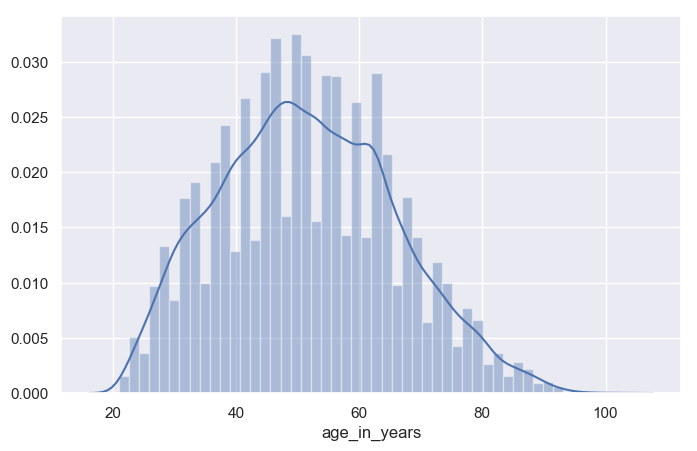

In [38]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.distplot(df.age_in_years);

-  Ages are normally distributed.

## target

In [39]:
df['target'].describe()

count   79853.0000
mean        0.9374
std         0.2422
min         0.0000
25%         1.0000
50%         1.0000
75%         1.0000
max         1.0000
Name: target, dtype: float64

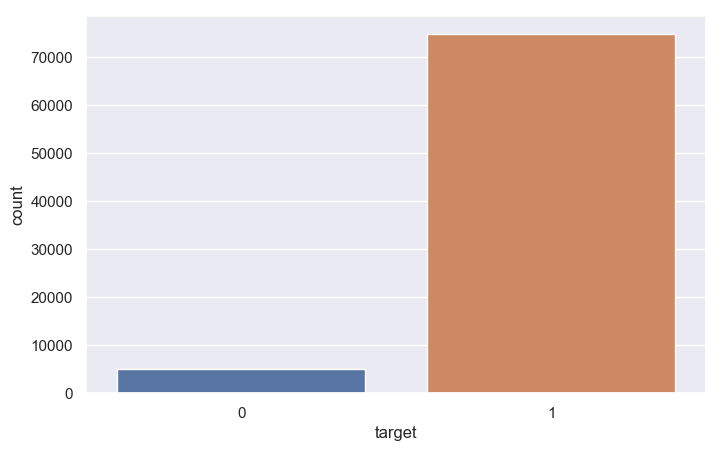

In [40]:
sns.countplot(df['target']);


# Bivariate Analysis

## Correlation

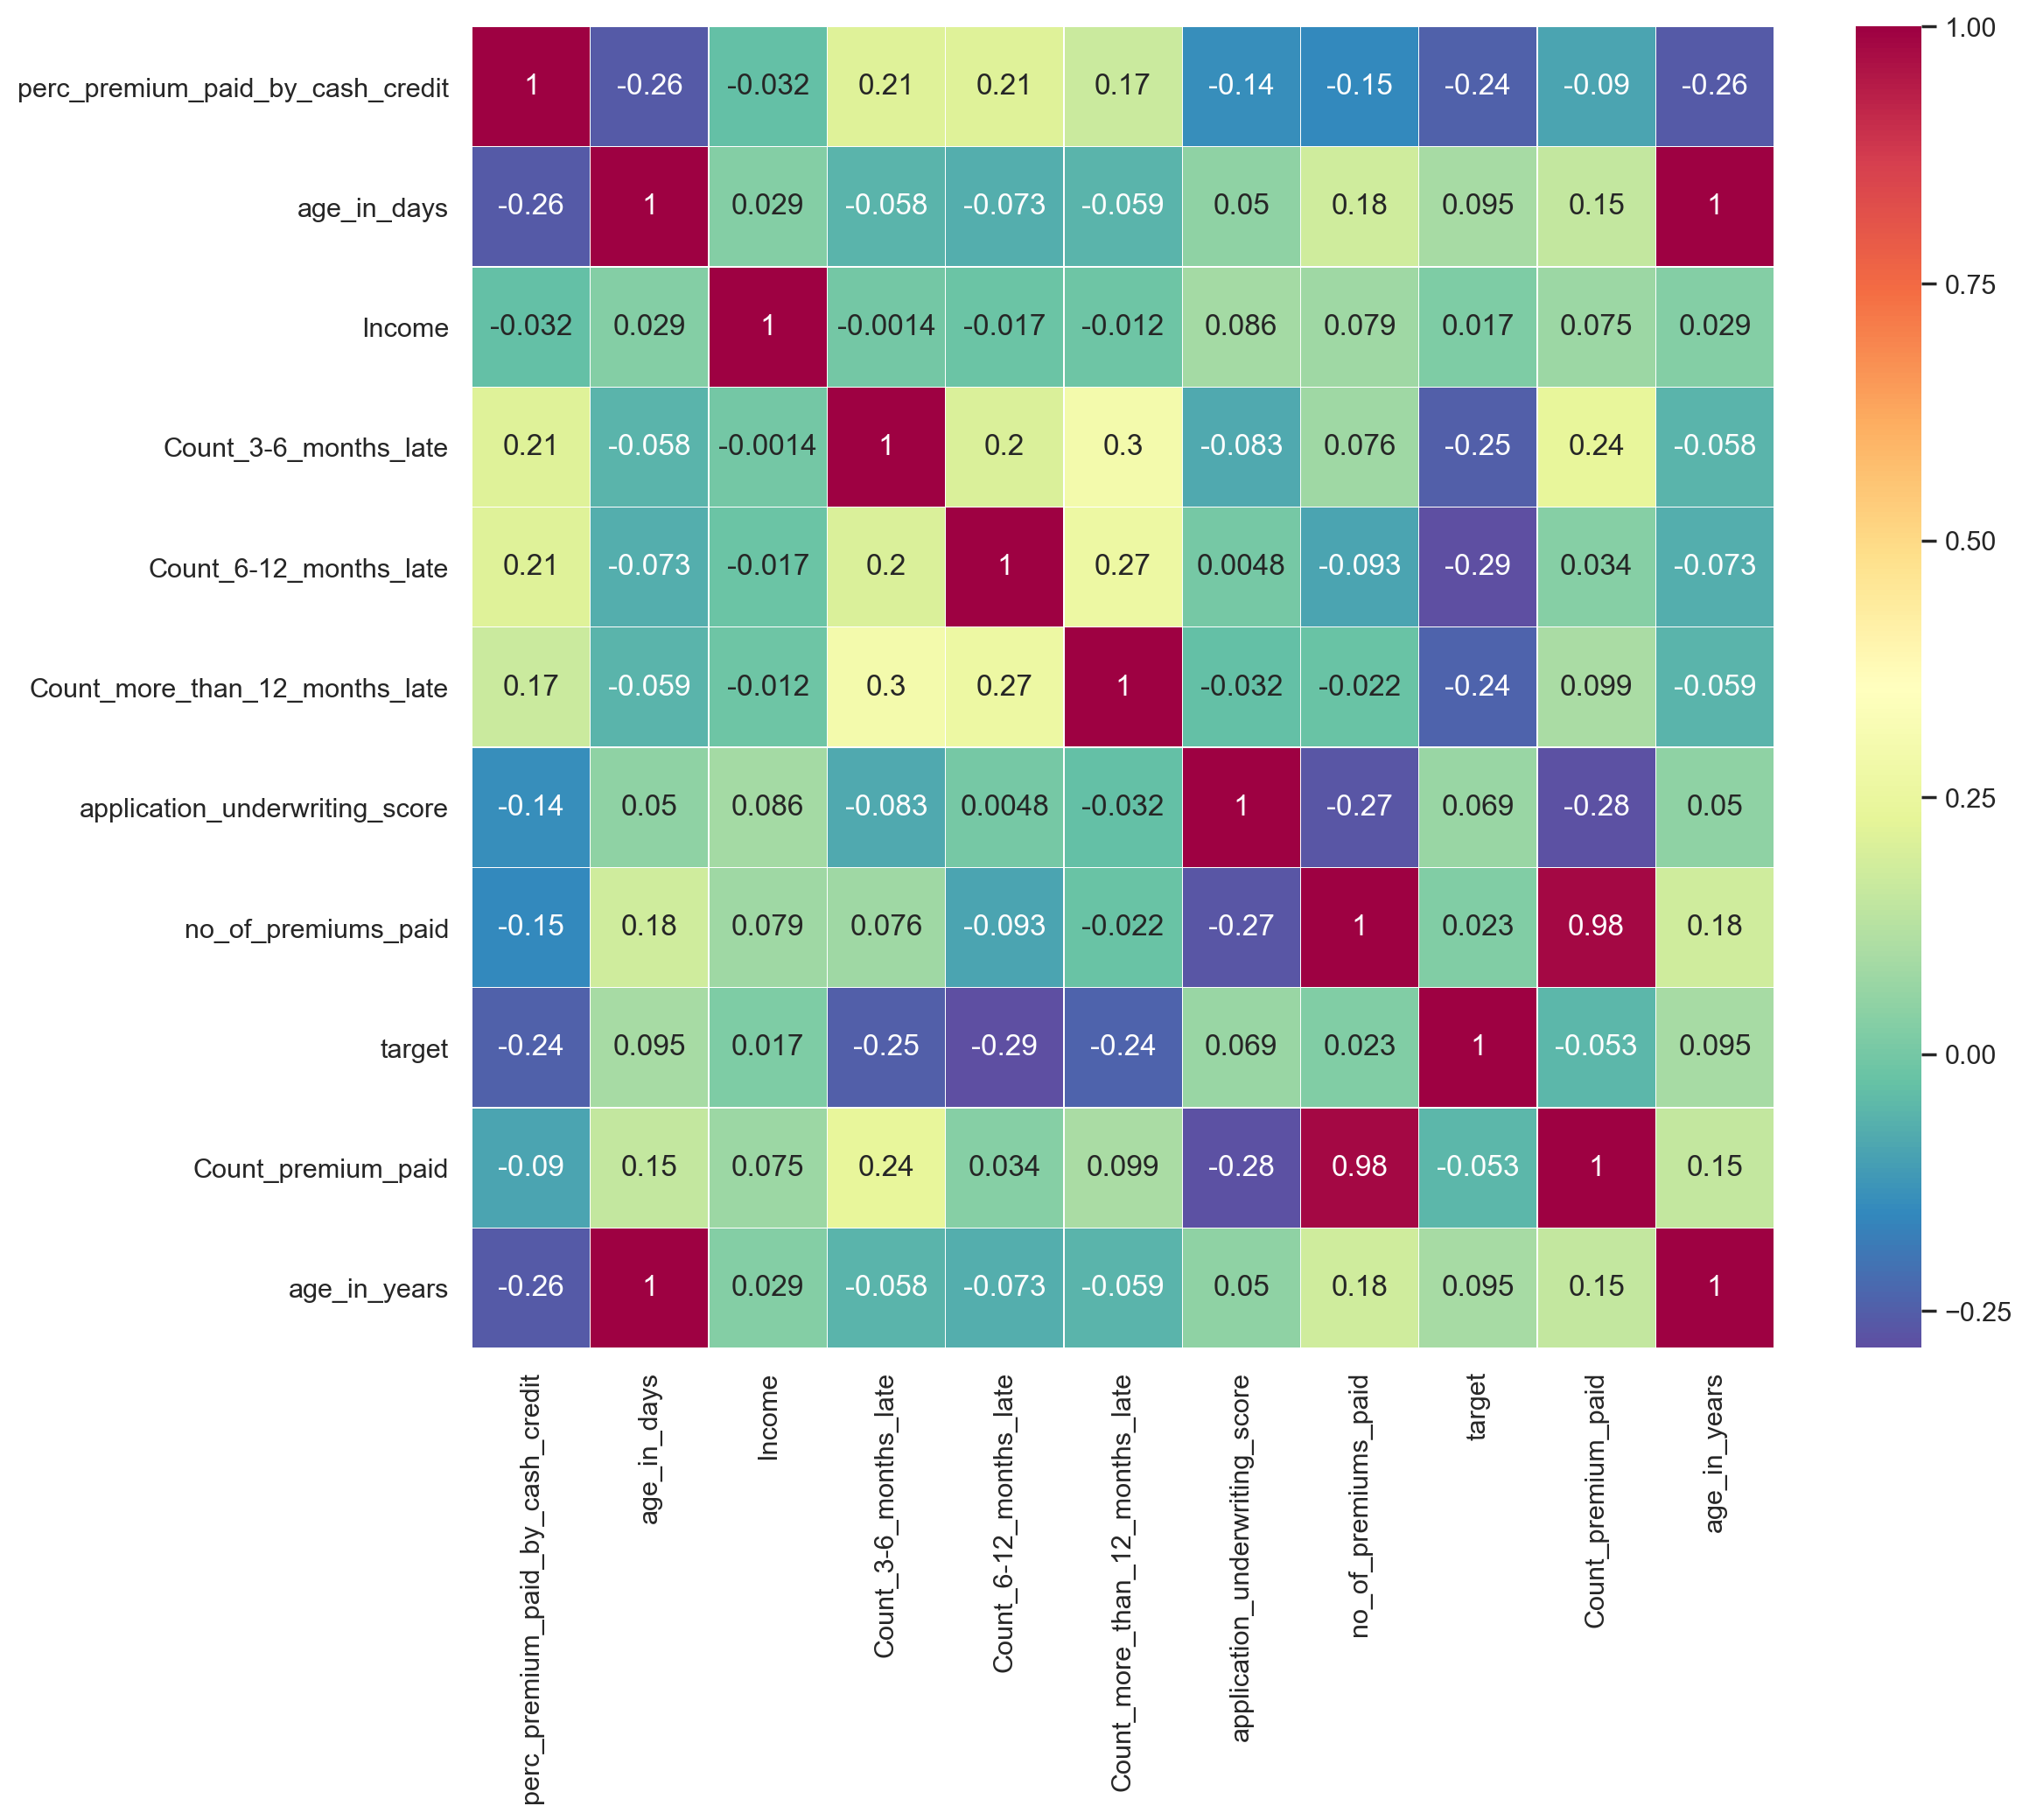

In [41]:
#Using seaborn set to plot heatmap
sns.set(rc={'figure.figsize':(12,10), 'figure.dpi':200})
cr = df.drop(columns=['id']).corr()
with sns.axes_style("whitegrid"):
    sns.heatmap( cr, cmap='Spectral_r', annot=True, square=False, linewidth=.1);

## target vs perc_premium_paid_by_cash_credit

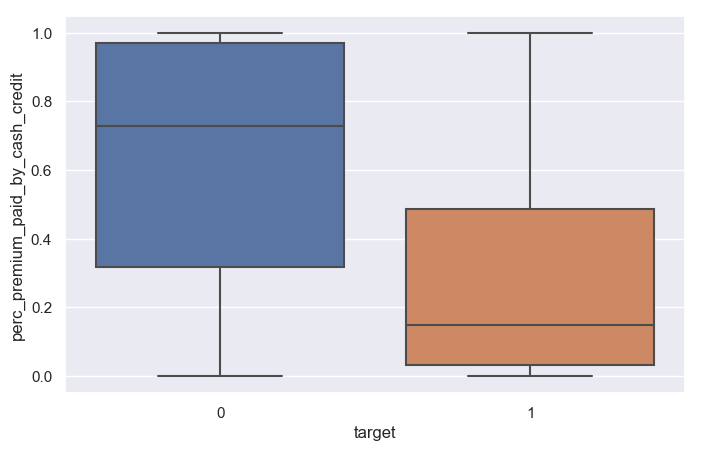

In [42]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(y='perc_premium_paid_by_cash_credit',x='target',data=df);

-  Can be binned two three bins

## target vs Count_3-6_months_late

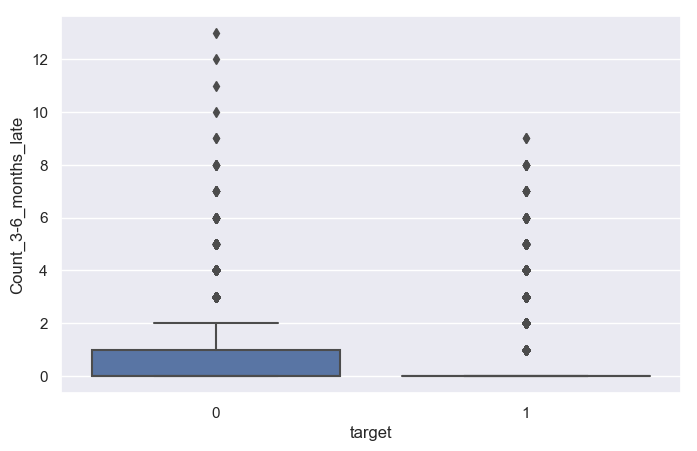

In [43]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(df['target'],df['Count_3-6_months_late']);

In [44]:
df.loc[df.target == 0,'Count_3-6_months_late'].value_counts()

0.0000     2627
1.0000     1153
2.0000      592
3.0000      288
4.0000      158
5.0000       67
6.0000       31
7.0000       10
8.0000        6
9.0000        2
10.0000       1
11.0000       1
12.0000       1
13.0000       1
Name: Count_3-6_months_late, dtype: int64

In [45]:
df.loc[df.target == 1,'Count_3-6_months_late'].value_counts()

0.0000    64174
1.0000     7673
2.0000     1927
3.0000      666
4.0000      216
5.0000      101
6.0000       37
7.0000       13
8.0000        9
9.0000        2
Name: Count_3-6_months_late, dtype: int64

## target vs Count_6-12_months_late

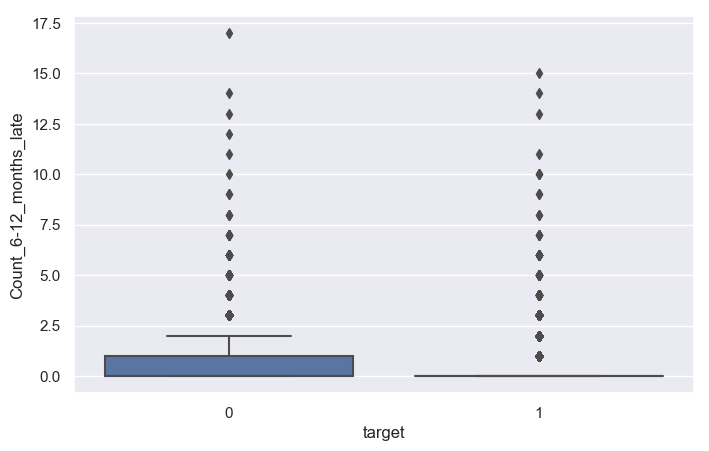

In [46]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(df['target'],df['Count_6-12_months_late']);

In [47]:
df.loc[df.target == 0,'Count_6-12_months_late'].value_counts()

0.0000     3445
1.0000      828
2.0000      334
3.0000      185
4.0000       85
5.0000       30
6.0000       13
7.0000        7
8.0000        3
9.0000        2
17.0000       1
12.0000       1
13.0000       1
14.0000       1
11.0000       1
10.0000       1
Name: Count_6-12_months_late, dtype: int64

In [48]:
df.loc[df.target == 1,'Count_6-12_months_late'].value_counts()

0.0000     72386
1.0000      1852
2.0000       359
3.0000       132
4.0000        45
5.0000        16
6.0000        13
7.0000         4
10.0000        3
9.0000         2
8.0000         2
15.0000        1
13.0000        1
11.0000        1
14.0000        1
Name: Count_6-12_months_late, dtype: int64

## target vs Count_more_than_12_months_late

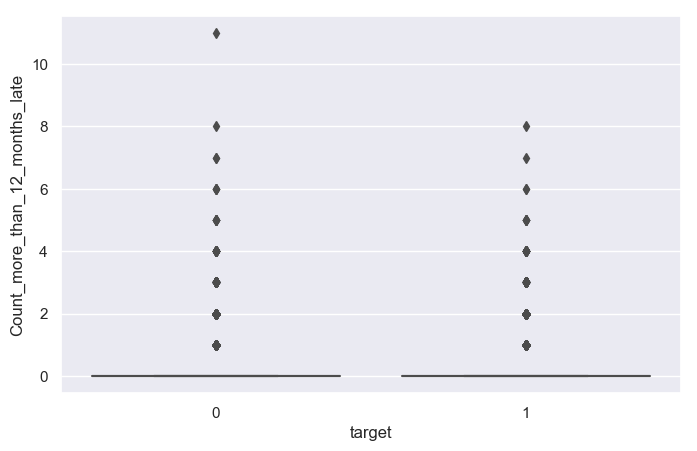

In [49]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(df['target'],df['Count_more_than_12_months_late']);

In [50]:
df.loc[df.target==0,'Count_more_than_12_months_late'].value_counts()

0.0000     3750
1.0000      835
2.0000      228
3.0000       85
4.0000       25
5.0000        7
6.0000        4
7.0000        2
8.0000        1
11.0000       1
Name: Count_more_than_12_months_late, dtype: int64

In [51]:
df.loc[df.target == 1,'Count_more_than_12_months_late'].value_counts()

0.0000    72288
1.0000     2161
2.0000      270
3.0000       66
4.0000       23
5.0000        6
6.0000        2
7.0000        1
8.0000        1
Name: Count_more_than_12_months_late, dtype: int64

## target vs Count_premium_paid

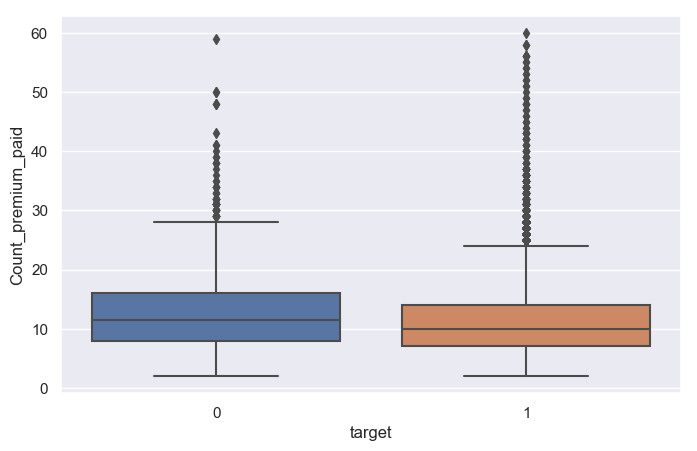

In [52]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(df['target'],df['Count_premium_paid']);

In [53]:
df.loc[(df.Count_premium_paid > 0),'target'].value_counts()

1    74818
0     4938
Name: target, dtype: int64

In [54]:
df.loc[df.target==0,'Count_premium_paid'].value_counts().sum()

4938

In [55]:
df.loc[df.target == 1,'Count_premium_paid'].value_counts().sum()

74818

## target vs sourcing_channel

In [56]:
df.loc[df.sourcing_channel=='A' ,'target'].value_counts()

1    40785
0     2349
Name: target, dtype: int64

In [57]:
df.loc[df.sourcing_channel=='B' ,'target'].value_counts()

1    15446
0     1066
Name: target, dtype: int64

In [58]:
df.loc[df.sourcing_channel=='C' ,'target'].value_counts()

1    11136
0      903
Name: target, dtype: int64

In [59]:
df.loc[df.sourcing_channel=='D' ,'target'].value_counts()

1    6925
0     634
Name: target, dtype: int64

In [60]:
df.loc[df.sourcing_channel=='E' ,'target'].value_counts()

1    563
0     46
Name: target, dtype: int64

-  Sourcing_channel are ordinal categorical variables

## target vs age_in_years

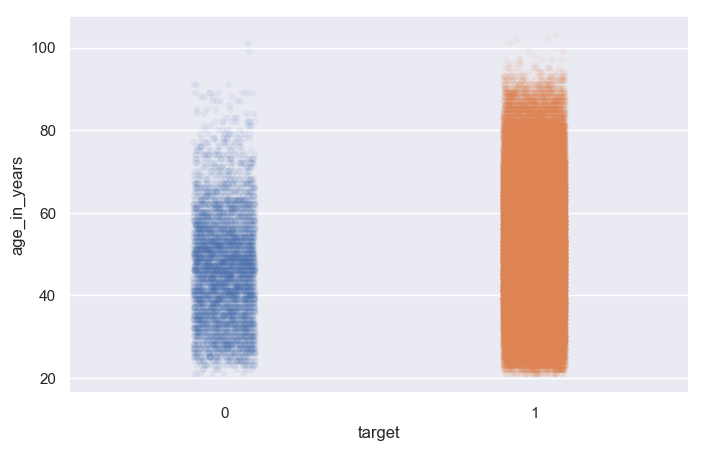

In [61]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.stripplot(x=df['target'],y=df['age_in_years'],jitter=True, dodge=True, alpha=0.075);

## target vs application_underwriting_score

In [62]:
df.loc[df.target==0,['application_underwriting_score']].describe()

,application_underwriting_score
count,4798.0000
mean,98.8703
std,0.8777
min,92.2400
25%,98.5300
50%,99.0500
75%,99.4800
max,99.8900


In [63]:
df.loc[df.target==1,['application_underwriting_score']].describe()

,application_underwriting_score
count,72081.0000
mean,99.0804
std,0.7278
min,91.9000
25%,98.8300
50%,99.2200
75%,99.5400
max,99.8900


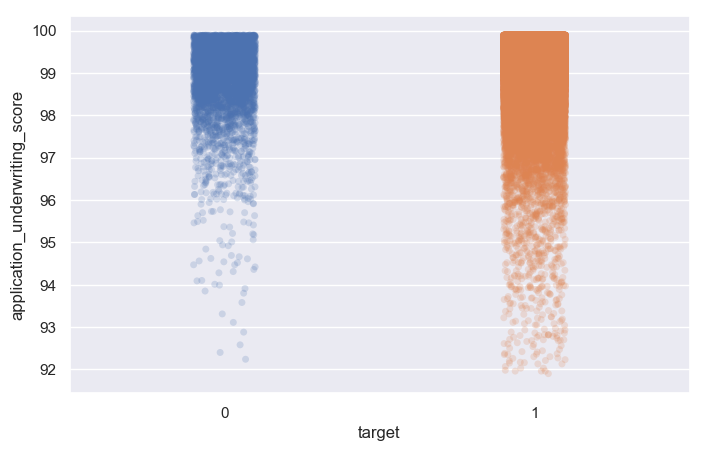

In [64]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.stripplot(x=df['target'],y=df['application_underwriting_score'],jitter=True, dodge=True, alpha=0.2);

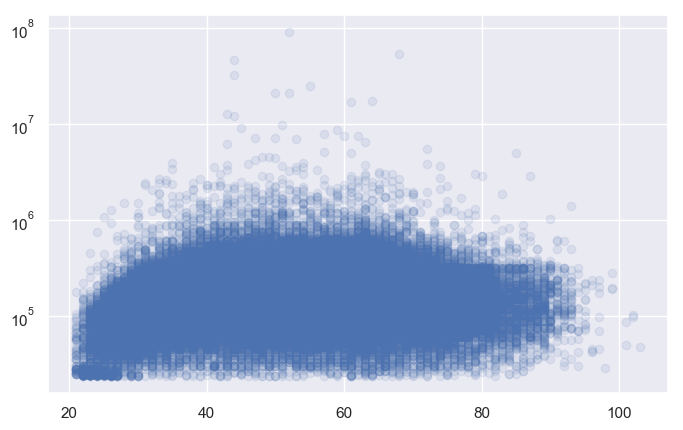

In [65]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
plt.scatter(y=df['Income'],x=df['age_in_years'], alpha=0.1);
plt.yscale('log')
# plt.yscale('log')

In [66]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from math import log

i_max = df_train['Income'].max()
i_min = df_train['Income'].min()
i_dif = i_max - i_min
# Create the Scaler object
scaler = StandardScaler()

le = LabelEncoder()
#Frequency encoding
enc = df.groupby('sourcing_channel').size()
enc = enc / len(df)

def data_transform(data):
    
    data['age_in_years'] = data['age_in_days'].apply(lambda x: x//365)
    
    data['Count_3-6_months_late'] = data['Count_3-6_months_late'].fillna(0)
    
    data['Count_6-12_months_late'] = data['Count_6-12_months_late'].fillna(0)
    
    data['Count_more_than_12_months_late'] = data['Count_more_than_12_months_late'].fillna(0)
    
    data['application_underwriting_score'] = data['application_underwriting_score'].fillna(data['application_underwriting_score'].mean())
    
    data['3_plus_late'] = data['Count_more_than_12_months_late'] + data['Count_6-12_months_late'] + data['Count_3-6_months_late']
    
    data['6_plus_late'] = data['Count_more_than_12_months_late'] + data['Count_6-12_months_late']
    
    data['Count_3-12_months_late'] = data['Count_6-12_months_late'] + data['Count_3-6_months_late']
    
    data['total_count_paid'] = data['3_plus_late'] + data['no_of_premiums_paid']
    
    data['perc_paid_late'] = data['3_plus_late'] / data['total_count_paid']
    
    data['perc_paid_ontime'] = data['no_of_premiums_paid'] / data['total_count_paid']
    
    data['ratio_late_ontime'] = data['3_plus_late'] / data['no_of_premiums_paid']
    
    #data['sourcing_encoded'] = df['sourcing_channel'].map(enc)
    
    data['residence_area_type'] = le.fit_transform(data['residence_area_type'])
    
    #data['sourcing_channel'] = le.fit_transform(data['sourcing_channel'])
    
    data = pd.get_dummies(data)
    
    data['normalized_underwriting_score'] = data['application_underwriting_score'] - 90
    
#     data['age_bin_round'] = np.array(np.floor(np.array(data['age_in_years']) / 10.))
    
    data['per_payment_perc'] = data['perc_premium_paid_by_cash_credit'] / data['total_count_paid']
    
    data['remaining_perc'] = 1 - data['perc_premium_paid_by_cash_credit']
    
    data['late_payments_0-1'] = data['3_plus_late'].apply( lambda x: 1 if x>0 else 0)
    
    #data['Income'] = data['Income'].apply( lambda x: log(x))
    
    #data['age_bin'] = np.array(np.floor(np.array(data['age_in_years']) / 10.))
    
    data = data.drop(['id','age_in_days','perc_premium_paid_by_cash_credit','residence_area_type',
                      'application_underwriting_score','sourcing_channel_B'], axis=1)
    
    
    return data
    
    
    

In [67]:
data2 = data_transform(df_train.copy())

In [68]:
data2.head().T

,0,1,2,3,4
Income,355060.0000,315150.0000,84140.0000,250510.0000,198680.0000
Count_3-6_months_late,0.0000,0.0000,2.0000,0.0000,0.0000
Count_6-12_months_late,0.0000,0.0000,3.0000,0.0000,0.0000
Count_more_than_12_months_late,0.0000,0.0000,1.0000,0.0000,0.0000
no_of_premiums_paid,13.0000,21.0000,7.0000,9.0000,12.0000
target,1.0000,1.0000,0.0000,1.0000,1.0000
age_in_years,33.0000,59.0000,48.0000,42.0000,86.0000
3_plus_late,0.0000,0.0000,6.0000,0.0000,0.0000
6_plus_late,0.0000,0.0000,4.0000,0.0000,0.0000
Count_3-12_months_late,0.0000,0.0000,5.0000,0.0000,0.0000


In [69]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,79853.0000,208847.1712,496582.5973,24030.0000,108010.0000,166560.0000,252090.0000,90262600.0000
Count_3-6_months_late,79853.0000,0.2484,0.6911,0.0000,0.0000,0.0000,0.0000,13.0000
Count_6-12_months_late,79853.0000,0.0781,0.4363,0.0000,0.0000,0.0000,0.0000,17.0000
Count_more_than_12_months_late,79853.0000,0.0599,0.3118,0.0000,0.0000,0.0000,0.0000,11.0000
no_of_premiums_paid,79853.0000,10.8639,5.1707,2.0000,7.0000,10.0000,14.0000,60.0000
target,79853.0000,0.9374,0.2422,0.0000,1.0000,1.0000,1.0000,1.0000
age_in_years,79853.0000,51.6074,14.2705,21.0000,41.0000,51.0000,62.0000,103.0000
3_plus_late,79853.0000,0.3864,1.0433,0.0000,0.0000,0.0000,0.0000,19.0000
6_plus_late,79853.0000,0.1380,0.6000,0.0000,0.0000,0.0000,0.0000,17.0000
Count_3-12_months_late,79853.0000,0.3265,0.8894,0.0000,0.0000,0.0000,0.0000,17.0000


In [70]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 22 columns):
Income                            79853 non-null int64
Count_3-6_months_late             79853 non-null float64
Count_6-12_months_late            79853 non-null float64
Count_more_than_12_months_late    79853 non-null float64
no_of_premiums_paid               79853 non-null int64
target                            79853 non-null int64
age_in_years                      79853 non-null int64
3_plus_late                       79853 non-null float64
6_plus_late                       79853 non-null float64
Count_3-12_months_late            79853 non-null float64
total_count_paid                  79853 non-null float64
perc_paid_late                    79853 non-null float64
perc_paid_ontime                  79853 non-null float64
ratio_late_ontime                 79853 non-null float64
sourcing_channel_A                79853 non-null uint8
sourcing_channel_C                79853 non-nu

In [71]:
c_m = data2.corr()
c_m['target'].sort_values()

perc_paid_late                   -0.3601
3_plus_late                      -0.3533
ratio_late_ontime                -0.3332
Count_3-12_months_late           -0.3308
6_plus_late                      -0.3305
Count_6-12_months_late           -0.2840
late_payments_0-1                -0.2728
Count_3-6_months_late            -0.2465
Count_more_than_12_months_late   -0.2385
per_payment_perc                 -0.1588
total_count_paid                 -0.0476
sourcing_channel_D               -0.0284
sourcing_channel_C               -0.0216
sourcing_channel_E               -0.0047
Income                            0.0165
no_of_premiums_paid               0.0227
sourcing_channel_A                0.0364
normalized_underwriting_score     0.0673
age_in_years                      0.0951
remaining_perc                    0.2410
perc_paid_ontime                  0.3601
target                            1.0000
Name: target, dtype: float64

In [72]:
# min_max_scaler = MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(data2.values)
# X = pd.DataFrame(x_scaled)

In [73]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

In [74]:
X = data2.drop(['target'], axis=1)
y = data2['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [75]:
import xgboost as xgb
from sklearn import metrics

In [76]:
xgc = xgb.XGBClassifier()

In [77]:
xgc.set_params( **{'colsample_bytree': 0.7,
 'eta': 0.03,
 'gamma': 1.0,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 250,
 'subsample': 0.85})

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.03, gamma=1.0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.85, verbosity=1)

In [78]:
xgc.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.03, gamma=1.0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.85, verbosity=1)

In [79]:
pd.DataFrame( xgc.feature_importances_, index=list(X.columns))

,0
Income,0.0087
Count_3-6_months_late,0.0143
Count_6-12_months_late,0.0347
Count_more_than_12_months_late,0.0039
no_of_premiums_paid,0.0215
age_in_years,0.0145
3_plus_late,0.1532
6_plus_late,0.1808
Count_3-12_months_late,0.0138
total_count_paid,0.0129


In [80]:
pd.Series(xgc.get_booster().get_score(importance_type="gain")).sort_values(ascending=False)

perc_paid_ontime                 245.2060
6_plus_late                      185.3405
3_plus_late                      157.0639
perc_paid_late                   101.8270
remaining_perc                    90.0964
ratio_late_ontime                 70.2418
Count_6-12_months_late            35.5475
no_of_premiums_paid               22.0238
per_payment_perc                  16.7268
normalized_underwriting_score     15.1451
age_in_years                      14.9044
Count_3-6_months_late             14.6851
Count_3-12_months_late            14.1230
total_count_paid                  13.2617
Income                             8.9063
sourcing_channel_D                 6.5177
sourcing_channel_C                 4.7763
Count_more_than_12_months_late     4.0422
sourcing_channel_A                 2.7557
sourcing_channel_E                 1.9583
dtype: float64

In [81]:
test = df_test.copy()

In [82]:
test = data_transform(test)

In [83]:
sub_file = pd.DataFrame(df_test['id'])

In [84]:
prob_pred = xgc.predict_proba(test)
sub_file['target'] = prob_pred[:,1]

In [85]:
sub_file.to_csv('solution_opt.csv', index=False)